# Class imbalance ⚖️

## What is it?

### Most machine learning algorithms assume that all misclassification errors made by a model are equal. This is often not the case for imbalanced classification problems where missing a positive or minority class case is worse than incorrectly classifying an example from the negative or majority class. There are many real-world examples, such as detecting spam email, diagnosing a medical condition, or identifying fraud. In all of these cases, a false negative (missing a case) is worse or more costly than a false positive. 

### Cost-sensitive learning is a subfield of machine learning that takes the costs of prediction errors (and potentially other costs) into account when training a machine learning model. It is a field of study that is closely related to the field of imbalanced learning that is concerned with classification on datasets with a skewed class distribution. As such, many conceptualizations and techniques developed and used for cost-sensitive learning can be adopted for imbalanced classification problems. In this tutorial, you will discover a gentle introduction to cost-sensitive learning for imbalanced classification. 

In [42]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import where
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [43]:
df = pd.read_csv("../data/creditcard.zip", index_col=0)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
df.shape

(284807, 28)

In [45]:
X = df.drop(["Class"], axis = 1)
X.columns
X.shape

y = df["Class"]
y.shape

(284807,)

In [48]:
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
#plt.show()

TypeError: '((array([     0,      1,      2, ..., 284804, 284805, 284806]),), 0)' is an invalid key

## Why is it a Problem?

- Because the classifier has an "incentive" to rather predict class 0. It just shows up so much more.


In [5]:
df["Class"].value_counts() / df.shape[0]

0    0.998273
1    0.001727
Name: Class, dtype: float64

### - Because of class imbalance in the dataset, any model will be a lot more exposed to the majority class ("non-event", "negative class" or "0") => predictions will be biased towards majority class.
### - Even a simple dummy model reflects this: generalizing that there a NO fraud cases whatsoever implies an error rate of only 1% => why invest in preparing data, training model, evaluate model, deploy and maintain it??
### -  In practice: consider the loss that one single fraud case can have on a whole financial institution (e.g. correspondent LLPs), or for that matter: many small fraud cases accumulated. Even if the fraud is detected, financial institutions suffer of "reputation risk", which in the case increases by higher order of magnitudes (leading in the worst case to bank runs).

## How can we deal with it?

### 1. Compare models and select best-performing one 🤓
### 2. Use the right evaluation metrics 🕙 🕞 🕚
### 3. Resample data 📲
### 4. Cost-sensitive learning 🔨💰

## After participating in this session, you will know:
### - Imbalanced classification problems often value false-positive classification errors differently from false negatives. 📲
### - Cost-sensitive learning is a subfield of machine learning that involves explicitly defining and using costs when training machine learning algorithms.💻
### - Cost-sensitive techniques may be divided into three groups, including data sampling, algorithm modifications, and ensemble methods. 📊

## Cost-sensitive Learning 🔨💰

### LogReg WITHOUT weights assigned to cost function - formally:

$$ \min \sum_{i=1}^{n} - (log(yhat_{i}) * y_{i} + log(1 - yhat_{i}) * (1 - y_{i}))$$ 

### LogReg WITHOUT weights assigned to cost function - defining, fitting and evaluating the model:

(284807,)

In [7]:
LogReg_unweighted = LogisticRegression(solver="lbfgs")    # instantiating the model

In [8]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # x-validation

In [9]:
scores = cross_val_score(LogReg_unweighted, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)  # defining evaluation metric ("ROC AUC")

/Users/carlospumar/opt/anaconda3/envs/SPICED_trial_lecture/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/carlospumar/opt/anaconda3/envs/SPICED_trial_lecture/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

In [10]:
print('Mean ROC AUC: %.3f' % mean(scores)) 

Mean ROC AUC: 0.917


### Mean ROC AUC = 0.917...but: what DOES this mean? 

## Use the right evaluation metrics 🕙 🕞 🕚: the ROC AUC

#### Splitting data into training and test set

In [11]:
X = df.iloc[:,:-1] 
y = df["Class"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y) # remember: you set "stratify" so that train data and labelled data have the same "proportions" re classes...
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((213605, 27), (71202, 27), (213605,), (71202,))

In [13]:
LogReg_unweighted.fit(X_train, y_train)

/Users/carlospumar/opt/anaconda3/envs/SPICED_trial_lecture/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

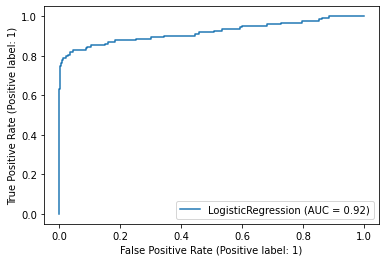

In [14]:
ROC_LogReg_unweighted = plot_roc_curve(LogReg_unweighted, X_test, y_test)
plt.show()


### Back to LogReg, now WITH weights - formally:

$$ \min \sum_{i=1}^{n} - (w_{0} * log(yhat_{i}) * y_{i} + w_{1} * log(1 - yhat_{i}) * (1 - y_{i}))$$ 

### LogReg WITH weights assigned to cost function - defining, fitting and evaluating the model:

In [15]:
weights = {0:0.01, 1:1.0} # note the weights assigned to loss function, whereby positive cases have a proportionally higher contribution to loss

In [16]:
LogReg_weighted = LogisticRegression(solver="lbfgs", class_weight=weights) # note the explicit spec of the "weights" param, as opposed to above

In [17]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [18]:
scores = cross_val_score(LogReg_weighted, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)  # defining evaluation metric ("ROC AUC")

/Users/carlospumar/opt/anaconda3/envs/SPICED_trial_lecture/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/carlospumar/opt/anaconda3/envs/SPICED_trial_lecture/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

In [19]:
print('Mean ROC AUC: %.3f' % mean(scores)) 

Mean ROC AUC: 0.957


In [ ]:
# models = ["LogReg_unweighted", "LogReg_weighted"]

# print(f"Comparing ROC AUC of LogReg models - without and with weighting of cost function.") 

# for name, model in models:                        
    
#     test_score = model.score(Xtest, ytest)
#     print(f"The test score for {model} is {test_score}.")
    
#     if test_score < train_score:
#         print(f"The {model} tends to overfit.")
    
#     elif train_score < test_score:
#         print(f"{model} tends to underfit but outperforms dummy model!") 

### Clearly, weighting cost function improves performance of LogReg on this imbalanced dataset (0.957 vs 0.917)!

In [23]:
LogReg_weighted.fit(X_train, y_train)

# LogReg_unweighted.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.01, 1: 1.0})

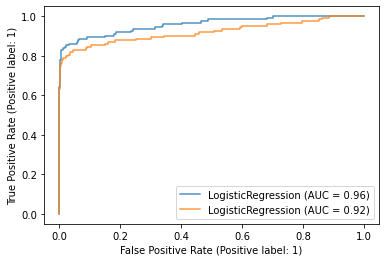

In [24]:
ax = plt.gca()

ROC_LogReg_weighted = plot_roc_curve(LogReg_weighted, X_test, y_test, ax=ax, alpha=0.8)
ROC_LogReg_unweighted.plot(ax=ax, alpha=0.8)

plt.show() 

#### compare a neural network the same way => eventually, you will have to go to google colab to do this